The next cell downloads the required data set to carry out the workshop. This kind of code only works on Google Colab, and if you are using another platform to run the notebook, you will need to manually download the data directory from the GitHub repository and put it in the same path as the notebook file.

In [2]:
!wget -O main.zip https://github.com/jandion/APSV-BusinessIntelligence/archive/refs/heads/main.zip
!unzip main.zip
!rm -rf data
!mv APSV-BusinessIntelligence-main/data .
!rm -r APSV-BusinessIntelligence-main main.zip

--2022-12-17 22:19:40--  https://github.com/jandion/APSV-BusinessIntelligence/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/jandion/APSV-BusinessIntelligence/zip/refs/heads/main [following]
--2022-12-17 22:19:40--  https://codeload.github.com/jandion/APSV-BusinessIntelligence/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [  <=>               ]  14.96M  11.5MB/s    in 1.3s    

2022-12-17 22:19:41 (11.5 MB/s) - ‘main.zip’ saved [15691344]

Archive:  main.zip
4cabea09456a143b49ce229fb224416d607235d4
   creating: APSV-BusinessIntelligence-main/


In this workshop, we will work with a set of data obtained from a real logistics process. These data contain events of a logistics process in which a series of goods or items are transported from one station to another by train. Trains move wagons in which various items can be transported. For each event, 3 instants of time are recorded:
1. The time in which the event is planned
2. The time at which the event was estimated.
3. The time at which the event actually occurred.

The fields in the data set have been anonymized, except for the times and descriptions of the events. The types of events appear in Spanish; the following table is a translation of these into English:

Spanish | English
---|---
'EXPEDICION DE VAGONES'          | 'EXPEDITION OF WAGONS'
'FIN DE CARGA DE VAGONES'        | 'END OF WAGON LOADING'
'FIN DE DESCARGA DE VAGONES'     | 'END OF WAGON UNLOADING'
'LLEGADA A DESTINO DE VAGONES'   | 'ARRIVAL AT DESTINATION OF WAGONS'
'LLEGADA DE MERCANCIAS'          | 'ARRIVAL OF ITEMS'
'LLEGADA DE VAGONES'             | 'ARRIVAL OF WAGONS'
'SALIDA DE VAGONES'              | 'DEPARTURE OF WAGONS'

Our goal is to obtain as much information as we can from this data set. We will achieve this in two ways: we will answer questions with numeric values (e.g. how many trains take part in the proccess?) or we will generate some charts to present information in a visual way (e.g. how is the distribution of items transported throughout the year?)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data/trains.zip")

# Dataset exploration
Any project related to data analysis starts with a study of the data itself. 
* What kind of data do we have?
* How is it organized? How many columns have each dataframe?
* Are there wrong or missing values?
* What does each value of a column mean? How many different values are in each column?

With the examples we saw in the previous workshop we try to answer those questions.

In [4]:
data.event_location.describe()

count       2213865
unique            9
top       STATION 3
freq         967324
Name: event_location, dtype: object

In [5]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213866 entries, 0 to 2213865
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      2213866 non-null  int64  
 1   item_id         2213865 non-null  float64
 2   container_type  2213863 non-null  object 
 3   container_id    2213865 non-null  float64
 4   client          2213865 non-null  object 
 5   event_type      2213862 non-null  object 
 6   event_location  2213865 non-null  object 
 7   sheduled_date   2213864 non-null  object 
 8   estimated_date  2213866 non-null  object 
 9   actual_date     2213863 non-null  object 
 10  origin          2213861 non-null  object 
 11  train_id        2213865 non-null  object 
 12  destination     2213861 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 219.6+ MB


In [6]:
data.describe()

,Unnamed: 0,item_id,container_id
count,2.213866e+06,2.213865e+06,2.213865e+06
mean,1.106932e+06,1.887896e+05,9.655729e+08
std,6.390882e+05,1.123321e+05,4.773801e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.534662e+05,9.229500e+04,1.202615e+09
50%,1.106932e+06,1.844500e+05,1.202618e+09
75%,1.660399e+06,2.834740e+05,1.203521e+09
max,2.213865e+06,3.941940e+05,1.783082e+09


In [7]:
data.head()

,Unnamed: 0,item_id,container_type,container_id,client,event_type,event_location,sheduled_date,estimated_date,actual_date,origin,train_id,destination
0,0,258641.0,WAGGON,1.204491e+09,CLIENT_2,EXPEDICION DE VAGONES,STATION 4,2017-01-27 12:00:00,2017-01-27 12:00:00,2017-01-27 12:00:00,LOCATION 25,TRAIN 3,LOCATION 10
1,1,258641.0,WAGGON,1.204491e+09,CLIENT_2,SALIDA DE VAGONES,STATION 4,2017-01-27 21:55:00,2017-01-27 21:55:00,2017-01-31 21:55:00,LOCATION 25,TRAIN 3,LOCATION 10
2,2,258641.0,WAGGON,1.204491e+09,CLIENT_2,LLEGADA A DESTINO DE VAGONES,STATION 1,2017-01-28 07:00:00,2017-01-28 07:50:00,2017-01-31 07:50:00,LOCATION 25,TRAIN 3,LOCATION 10
3,3,258641.0,WAGGON,1.204491e+09,CLIENT_2,FIN DE DESCARGA DE VAGONES,STATION 1,2017-01-30 18:10:00,2017-01-28 19:00:00,2017-01-31 18:10:00,LOCATION 25,TRAIN 3,LOCATION 10
4,4,260068.0,WAGGON,1.204491e+09,CLIENT_2,EXPEDICION DE VAGONES,STATION 4,2017-01-27 12:00:00,2017-01-27 12:00:00,2017-01-27 12:00:00,LOCATION 25,TRAIN 3,LOCATION 10


In [8]:
data.destination.unique()

array(['LOCATION 10', 'LOCATION 11', 'LOCATION 20', 'LOCATION 19',
       'LOCATION 24', 'LOCATION 16', 'LOCATION 2', 'LOCATION 23',
       'LOCATION 3', 'LOCATION 12', 'LOCATION 18', 'LOCATION 17', nan,
       'LOCATION 5', 'LOCATION 9', 'LOCATION 22', 'LOCATION 6',
       'LOCATION 7', 'LOCATION 4', 'LOCATION 8'], dtype=object)

In [9]:
data.origin.unique()

array(['LOCATION 25', 'LOCATION 21', 'LOCATION 14', 'LOCATION 13',
       'LOCATION 1', nan, 'LOCATION 26', 'LOCATION 15'], dtype=object)

In [10]:
data.origin.describe()

count         2213861
unique              7
top       LOCATION 13
freq           967327
Name: origin, dtype: object

In [11]:
data.event_location.unique()

array(['STATION 4', 'STATION 1', 'STATION 8', 'STATION 9', 'STATION 3',
       'STATION 5', 'STATION 2', 'STATION 7', 'STATION 6', nan],
      dtype=object)

In [12]:
data.event_location.describe()

count       2213865
unique            9
top       STATION 3
freq         967324
Name: event_location, dtype: object

In [13]:
data.client.unique()

array(['CLIENT_2', 'CLIENT_1', 'CLIENT_4', 'CLIENT_0', 'CLIENT_3', nan],
      dtype=object)

In [14]:
data.client.describe()

count      2213865
unique           5
top       CLIENT_1
freq       1323006
Name: client, dtype: object

In [15]:
data.container_type.describe()

count     2213863
unique          1
top        WAGGON
freq      2213863
Name: container_type, dtype: object

# Data Cleaning
After a first view of the data and before starting to work with it, we must clean it. This process is called preprocessing, and it is crucial to be able to obtain good results. We will discard invalid data, fill missing values, drop redundant information, correct typos, etc. We need to create a data set with the following restrictions.

* All columns must contain relevant information.
* Rows with null or incorrect values should be discarded unless these values can be retrieved in some way (https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
* The types of the columns must correspond to the type of data they contain (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)

Python and Pandas have a multitude of methods that make it easier to work with dates. In this workshop can be useful those that allow us to obtain certain fragments of a date (hour of day, the day of the week, etc.) https://docs.python.org/3/library/datetime.html. An effective way to apply a change to an entire column is with a syntax like `data.planned_date.dt.hour`, which allows us to get the hour of the dates in the column `planned_date`

### Coursework (Sergio Olivares)

In [4]:
clean_data = data

First, we will remove some redundant columns:
`Unnamed:0`, as it's an index that Pandas already gives us
`container_type`, as its value is always "WAGGON", so it doesn't provide relevant information.
Then, `container_id` can be renamed to `waggon_id`.

In [5]:
clean_data.drop(columns=['Unnamed: 0', 'container_type'], inplace=True)
clean_data.rename(columns={'container_id': 'waggon_id'}, inplace=True)

Second, we need to try to fill the empty values when the information can be inferred. Nevertheless, before doing that, we need to normalize all the "empty" values. We want them to be NaN, but, for example, there are some `0` values in `waggon_id` column. We'll transform them to NaN.

In [6]:
clean_data.replace(0, np.nan, inplace=True)


In [7]:
clean_data.sort_values(by='item_id', inplace=True)
clean_data[['waggon_id', 'client', 'origin', 'train_id', 'destination']] = clean_data[['waggon_id', 'client', 'origin', 'train_id', 'destination']].fillna(method='ffill')

The rest of rows with some empty value that cannot be inferred will be discarded.

In [8]:
clean_data.dropna(inplace=True)

Columns `client`, `event_location`, `origin`, `destination` and `train_id` contains the same format for values: name + id. Then, these 4 could be transformed to integer type. Names will also be changed to proper ones: `client_id`, `station_id` (event locations are all stations), `origin_location_id` and `destination_location_id` (all origin/destinations are "LOCATION X")

In [9]:
def remove_title(value):
  title_and_id = value.replace('_', ' ').split()
  return int(title_and_id[1])

clean_data.client = clean_data.client.apply(remove_title)
clean_data.event_location = clean_data.event_location.apply(remove_title)
clean_data.origin = clean_data.origin.apply(remove_title)
clean_data.destination = clean_data.destination.apply(remove_title)
clean_data.train_id = clean_data.train_id.apply(remove_title)


In [10]:
clean_data.rename(columns={"client": "client_id", "event_location": "station_id", "origin": "origin_location_id", "destination": "destination_location_id", "sheduled_date": "scheduled_date"}, inplace=True)

Now it's time to set the proper types for each column. All the ids will be transformed to integers, the dates to datetime64 and the event type to category type.

In [11]:
clean_data.item_id = clean_data.item_id.astype('int')
clean_data.waggon_id = clean_data.waggon_id.astype('int')
clean_data.event_type = clean_data.event_type.astype('category')
clean_data.scheduled_date = clean_data.scheduled_date.astype('datetime64[ns]')
clean_data.estimated_date = clean_data.estimated_date.astype('datetime64[ns]')
clean_data.actual_date = clean_data.actual_date.astype('datetime64[ns]')


For the event type, the values will be translated to English to maintain a same language for all the data:

In [12]:
clean_data.event_type.cat.rename_categories({'EXPEDICION DE VAGONES': 'EXPEDITION OF WAGONS', 'FIN DE CARGA DE VAGONES': 'END OF WAGON LOADING', 'FIN DE DESCARGA DE VAGONES': 'END OF WAGON UNLOADING', 'LLEGADA A DESTINO DE VAGONES': 'ARRIVAL AT DESTINATION OF WAGONS', 'LLEGADA DE MERCANCIAS': 'ARRIVAL OF ITEMS', 'LLEGADA DE VAGONES': 'ARRIVAL OF WAGONS', 'SALIDA DE VAGONES': 	'DEPARTURE OF WAGONS'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


Finally, we will sort them in a more logical and easy-to-see way:

In [13]:
clean_data = clean_data[['event_type', 'station_id', 'scheduled_date', 'estimated_date', 'actual_date', 'item_id', 'waggon_id', 'train_id', 'origin_location_id', 'destination_location_id', 'client_id']]

In [14]:
clean_data.head()

,event_type,station_id,scheduled_date,estimated_date,actual_date,item_id,waggon_id,train_id,origin_location_id,destination_location_id,client_id
1326876,EXPEDITION OF WAGONS,4,2018-08-02 12:00:00,2018-08-02 14:00:00,2018-08-02 14:00:00,1,1202617878,4,21,20,2
1326877,DEPARTURE OF WAGONS,4,2018-08-02 13:40:00,2018-08-02 15:07:00,2018-08-02 13:07:00,1,1202617878,4,21,20,2
1326878,ARRIVAL AT DESTINATION OF WAGONS,8,2018-08-03 07:00:00,2018-08-03 00:23:00,2018-08-02 22:56:00,1,1202617878,4,21,20,2
1326879,END OF WAGON UNLOADING,8,2018-08-03 13:00:00,2018-08-03 14:00:00,2018-08-03 20:37:00,1,1202617878,4,21,20,2
2106845,ARRIVAL OF ITEMS,4,2018-07-26 07:00:00,2018-07-26 06:59:00,2018-07-27 01:48:00,1,1202617878,4,21,20,2


# Data Analytics

Once we know about the data that we are using and have cleaned it, we need to ask what kind of useful information we can extract from those data. It is a good idea to make a kind of brainstorming of possible questions, then take the list of resulting questions and sort them by their difficulty, and finally begin to answer them starting by the easiest ones.

## Basic results

Some of the easiest questions or more basic results we can obtain are the following:
* Numeric results
    * How many packages are there?
    * How many trains are there?
    * How many wagons are there?
    * How many stations are there?
    * How many routes are there? (combination of origin and destination)
    * Which is the most used train?
    * How many types of events are there?
    * What is the average delay of each type of event?
    * How many packages are processed at each of the stations?

* Graphic results
    * Bar chart of the number of packages processed at each station
    * Histogram of the delay in minutes
    * Distributions of the number of packages handled according to dates (all three), i.e. the number of unique item_id per day.

By answering these questions, you may discover some inconsistencies or errors in the data that you did not detect in the cleaning phase. This is usual in this type of task; you can return to the preprocessing phase with this new knowledge and refine the cleaning of the data.

Some of those questions are just countings, summations, or rankings, but others need data aggregations with groupby.

**Answer each question in a different cell of this notebook (remember that you can insert a new cell from the Insert menu).**


### Coursework (Sergio Olivares)

In [115]:
print("1. How many packages are there?")
clean_data.item_id.nunique()

1. How many packages are there?


394194

In [91]:
print("2. How many trains are there?")
clean_data.train_id.nunique()

2. How many trains are there?


10

In [92]:
print("3. How many wagons are there?")
clean_data.waggon_id.nunique()

3. How many wagons are there?


806

In [93]:
print("4. How many stations are there?")
clean_data.station_id.nunique()

4. How many stations are there?


9

In [108]:
print("5. How many routes are there? (combination of origin and destination)")
clean_data.groupby(['origin_location_id','destination_location_id']).size().count()

5. How many routes are there? (combination of origin and destination)


19

In [114]:
print("6. Which is the most used train?")
clean_data.train_id.value_counts().idxmax()

6. Which is the most used train?


2

In [119]:
print("7. How many types of events are there?")
print(clean_data.event_type.nunique())
clean_data.event_type.cat.categories.tolist()

7. How many types of events are there?
7


['EXPEDITION OF WAGONS',
 'END OF WAGON LOADING',
 'END OF WAGON UNLOADING',
 'ARRIVAL AT DESTINATION OF WAGONS',
 'ARRIVAL OF ITEMS',
 'ARRIVAL OF WAGONS',
 'DEPARTURE OF WAGONS']

In [155]:
print("8. What is the average delay of each type of event?")

group = clean_data.groupby('event_type')

def calculate_delay(row):
  return row['actual_date'] - row['scheduled_date']

group.apply(calculate_delay).mean()

8. What is the average delay of each type of event?


Timedelta('0 days 21:25:05.916823633')

In [135]:
print("9. How many packages are processed at each of the stations?")

packages_by_station = clean_data.groupby('station_id').item_id.nunique()

print(packages_by_station)

9. How many packages are processed at each of the stations?
station_id
1     74312
2       200
3    241651
4    152341
5    161075
6       200
7       200
8     78027
9     80570
Name: item_id, dtype: int64


10. Bar chart of the number of packages processed at each station


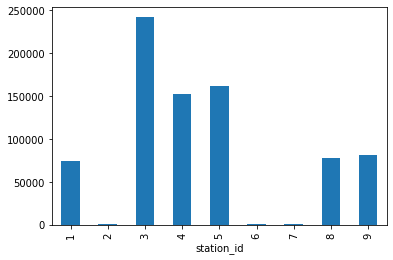

In [141]:
print("10. Bar chart of the number of packages processed at each station")

packages_by_station.plot(kind='bar')

11. Histogram of the delay in minutes


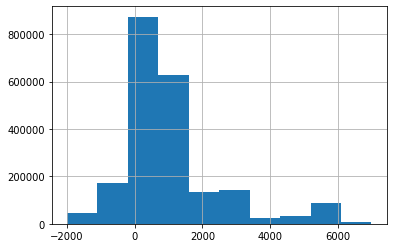

In [183]:
print("11. Histogram of the delay in minutes")

def calculate_delay_in_minutes(row):
  return (row['actual_date'] - row['scheduled_date']).total_seconds() / 60

histogram_data = clean_data.apply(calculate_delay_in_minutes, axis=1)

histogram_data.hist(bins=10, range=[-2000, 7000])

12. Distributions of the number of packages handled according to dates (all three), i.e. the number of unique item_id per day.


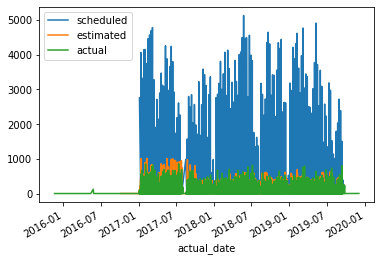

In [187]:
print("12. Distributions of the number of packages handled according to dates (all three), i.e. the number of unique item_id per day.")

scheduled_date_items = clean_data.groupby('scheduled_date').item_id.nunique()
estimated_date_items = clean_data.groupby('estimated_date').item_id.nunique()
actual_date_items = clean_data.groupby('actual_date').item_id.nunique()

ax = scheduled_date_items.plot(label='scheduled')
ax = estimated_date_items.plot(ax=ax, label='estimated')
ax = actual_date_items.plot(ax=ax, label='actual')

ax.legend()

plt.show()


# Intermediate results

* Numeric results
    * How many different routes do each of the trains do? 
    * What are the average, max, and min durations of the complete process of a package? (difference between the first and last date registered for an item)
    * What is the day of the week on which more shipments are made?
    * In which months each train is active?, and on what days of the week?
    * How long does it take on average to load a wagon?
    * How many packages does each train carry on each journey? And how many wagons?
    * On which stations does each client operate?

* Graphic results.
    * Distribution of the delay in minutes of the event x by train
    * Number of packages (cumulative) that each station has processed over time
    * Distribution of delays according to the type of event

**Answer at least 5 of these questions**

### Coursework (Sergio Olivares)

In [15]:
print("1 What is the day of the week on which more shipments are made")

clean_data.groupby(clean_data.scheduled_date.dt.day_name()).item_id.nunique().reset_index().max()

1 What is the day of the week on which more shipments are made


scheduled_date    Wednesday
item_id              394189
dtype: object

In [16]:
print("2. In which months each train is active?, and on what days of the week?")

import calendar

print(clean_data.groupby('train_id')['scheduled_date'].apply(lambda x: [calendar.month_name[month] for month in x.dt.month.unique().tolist()]))

print(clean_data.groupby('train_id')['scheduled_date'].apply(lambda x: [calendar.day_name[day] for day in x.dt.dayofweek.unique().tolist()]))

2. In which months each train is active?, and on what days of the week?
train_id
0                                         [May, April]
1                                              [March]
2    [April, June, July, August, September, Februar...
3    [March, January, February, April, May, June, J...
4    [August, July, January, March, February, April...
5    [February, January, March, April, May, June, J...
6                                [June, May, February]
7    [March, April, August, July, June, May, Septem...
8                                       [July, August]
9                                           [December]
Name: scheduled_date, dtype: object
train_id
0                           [Monday, Friday, Thursday]
1                       [Thursday, Wednesday, Tuesday]
2    [Saturday, Tuesday, Thursday, Monday, Wednesda...
3    [Monday, Thursday, Tuesday, Wednesday, Friday,...
4    [Thursday, Friday, Monday, Saturday, Tuesday, ...
5    [Friday, Thursday, Saturday, Monday, Tuesday

In [30]:
print("3. How many packages does each train carry on each journey? And how many wagons?")

grouped = clean_data.groupby(['train_id', 'origin_location_id', 'destination_location_id'])

with_waggons = grouped.waggon_id.nunique().reset_index(name="n. of waggons")

with_packages = grouped.size().reset_index(name="n. of packages")

pd.merge(with_waggons, with_packages, how="inner")

3. How many packages does each train carry on each journey? And how many wagons?


,train_id,origin_location_id,destination_location_id,n. of waggons,n. of packages
0,0,1,12,20,1000
1,1,14,24,50,1250
2,2,13,16,372,462491
3,2,13,17,101,3890
4,2,13,18,135,68938
5,3,15,22,93,996
6,3,25,2,393,134248
7,3,25,3,303,37166
8,3,25,4,10,310
9,3,25,5,91,24873


In [35]:
print("4. On which stations does each client operate?")

clean_data.groupby(['client_id', 'station_id']).size().reset_index()


4. On which stations does each client operate?


,client_id,station_id,0
0,0,3,58457
1,0,5,29227
2,1,3,882016
3,1,5,279780
4,1,9,161202
5,2,1,148400
6,2,4,457212
7,2,8,156287
8,3,3,26847
9,3,5,13422


5. Number of packages (cumulative) that each station has processed over time.
          scheduled_date  station_id  cumulative_count
0    2017-01-05 07:00:00           3              1569
1    2017-01-05 07:00:00           4              2757
2    2017-01-10 15:00:00           4              2997
3    2017-01-10 16:52:00           4              3237
4    2017-01-10 20:30:00           3              3621
...                  ...         ...               ...
9104 2019-09-20 16:00:00           4           2212897
9105 2019-09-20 18:40:00           1           2213135
9106 2019-09-20 23:00:00           4           2213373
9107 2019-09-21 07:25:00           1           2213612
9108 2019-09-22 19:00:00           1           2213850

[9109 rows x 3 columns]


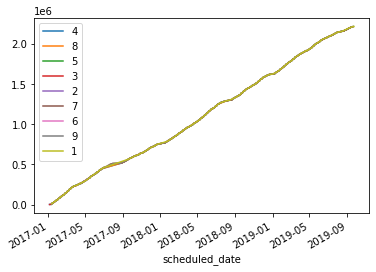

In [64]:
print("5. Number of packages (cumulative) that each station has processed over time.")
counts = clean_data.sort_values('scheduled_date').groupby(['scheduled_date', 'station_id']).size().cumsum().reset_index(name="cumulative_count")
stations = clean_data.station_id.unique()

fig, ax = plt.subplots()

for station_id in stations:
  ax = counts.loc[counts['station_id'] == station_id].plot(x='scheduled_date', y='cumulative_count', label=station_id, ax=ax)

ax.legend()

plt.show()


## Advanced results

* Identification of stations
    The sources and destinations that appear in the data correspond to platforms of the different stations. For example, LOCATION 19 is a platform of STATION 8. The task consists of creating two new columns, origin_station and destination_station obtained from identifying which locations correspond to each station. 

    Tip: This is an exploration task that can be done in several ways, one way to start is with the meaning of events. The event " LLEGADA A DESTINO DE VAGONES " is always recorded at the destination station of an item.


* Processes: 
    The life cycle of each package can be viewed as a sequence of states representing the logistics process.
    * How many different process sequences appear in the data? Which one or which are correct?
    * Among those that are correct, which are the most frequent?
    * How could you correct the wrong ones?

**Optional**